In [281]:
import pandas as pd
import collections
import nltk
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
lemmatizer = WordNetLemmatizer()
#stemmer = PorterStemmer()
stemmer = SnowballStemmer("english")

In [19]:
# to do, format this better and focus analysis only on these conferences, update the df in the beginning
venue_map = [('CHI Extended Abstracts', 'CHI'),
 ('CHI', 'CHI'),
 ('CSCW', 'CSCW'),
 ('UbiComp', 'UBI'),
 ('UIST', 'UIST'),
 ('Computer Supported Cooperative Work (CSCW)', 'CSCW'),
 ('UbiComp Adjunct', 'UBI'),
 ('CSCW Companion', 'CSCW'),
 ('CHI Conference Companion', 'CHI'),
 ('UbiComp/ISWC Adjunct', 'UBI'),
 ("CHI EA '04", 'CHI'),
 ('CHI 95 Conference Companion', 'CHI'),
 ('CHI Conference Summary', 'CHI'),
 ("UbiComp '11", 'UBI'),
 ('CHI 2014', 'CHI'),
 ("CHI '92", 'CHI'),
 ("CHI '99", 'CHI'),
 ("CHI '03", 'CHI'),
 ("CSCW '13", 'CSCW'),
 ("CHI '95", 'CHI'),
 ("CHI '89", 'CHI'),
 ("UbiComp '10 Adjunct", 'UBI'),
 ("CHI '90", 'CHI'),
 ("CHI '94", 'CHI'),
 ("CSCW '06", 'CSCW'),
 ("CSCW '10", 'CSCW'),
 ("CHI '83", 'CHI'),
 ("UIST'14 Adjunct", 'UIST'),
 ("CHI '87", 'CHI'),
 ("CHI '86", 'CHI'),
 ("CSCW '96", 'CSCW'),
 ("UIST '13 Adjunct", 'UIST'),
 ("CSCW '00", 'CSCW'),
 ("CSCW '98", 'CSCW'),
 ("UIST '10", 'UIST'),
 ("CHI '88", 'CHI'),
 ("CSCW '02", 'CSCW'),
 ("UIST Adjunct Proceedings '12", 'UIST'),
 ("CHI '85", 'CHI'),
 ("CSCW '94", 'CSCW'),
 ("CSCW '92", 'CSCW'),
 ("UIST '04", 'UIST'),
 ("UIST '11 Adjunct", 'UIST'),
 ("UIST '08", 'UIST'),
 ("UIST '09", 'UIST'),
 ("CHI '82", 'CHI'),
 ("UIST '97", 'UIST'),
 ("CSCW '86", 'CSCW'),
 ("UIST '95", 'UIST'),
 ("UIST '98", 'UIST'),
 ("UIST '94", 'UIST'),
 ("CSCW '88", 'CSCW'),
 ("UIST '01", 'UIST'),
 ("UIST '96", 'UIST'),
 ("UIST '00", 'UIST'),
 ("UIST '93", 'UIST'),
 ("CSCW '90", 'CSCW'),
 ("UIST '99", 'UIST'),
 ("UIST '02", 'UIST'),
 ("UIST '03", 'UIST'),
 ('CHI 2007', 'CHI'),
 ("UIST '91", 'UIST'),
 ("UIST '89", 'UIST'),
 ("UIST '90", 'UIST'),
 ('CHI 2010', 'CHI'),
 ("UIST '92", 'UIST'),
 ('CHI 2008', 'CHI'),
 ('UBICOMP 2015', 'UBI'),
 ('CHI 2011', 'CHI'),
 ('CHI 2009', 'CHI'),
 ('Ubicomp 2009', 'UBI'),
 ('UbiComp 2016', 'UBI'),
 ('UbiComp 2011', 'UBI'),
 ('CHI 1994', 'CHI'),
 ('CHI 2012', 'CHI'),
 ('CHI 2002', 'CHI'),
 ('CHI 2013', 'CHI'),
 ("CHI '81", 'CHI'),
 ('CHI 2017', 'CHI'),
 ('UbiComp 2014', 'UBI'),
 ('CHI 2015', 'CHI'),
 ('CHI 2006', 'CHI'),
 ('UbiComp 2013', 'UBI'),
 ('UbiComp 2008', 'UBI'),
 ('CHI 2003', 'CHI'),
 ('Ubicomp 2010', 'UBI'),
 ('CHI 2001', 'CHI'),
 ('CHI 2018', 'CHI'),
 ('CHI 1995', 'CHI'),
 ("CHI '02", 'CHI'),
 ('CSCW 2017', 'CSCW'),
 ('Computer Supported Cooperative Work and Social Computing', 'CSCW'),
 ('CHI 1997', 'CHI'),
 ('CHI 2016', 'CHI'),
 ('CHI 2005', 'CHI'),
 ('Proc. ACM Hum. Comput. Interact.', 'CSCW'),
 ('Comput. Support. Cooperative Work.', 'CSCW'),
 ('UBICOMP 2012', 'UBI'),
 ('CHI 1998', 'CHI'),
 ('CHI 2004', 'CHI'),
 ('CSCW 2008', 'CSCW'),
 ('CSCW 2016', 'CSCW'),
 ('UIST 2013', 'UIST'),
 ('UIST 2016', 'UIST'),
 ('UIST 2014', 'UIST'),
 ('UIST 2011', 'UIST'),
 ('CHI 1993', 'CHI'),
 ('CHI 2000', 'CHI'),
 ('CSCW 2010', 'CSCW'),
 ('CSCW 2012', 'CSCW'),
 ('CSCW 2014', 'CSCW'),
 ('CSCW 2013', 'CSCW'),
 ('CSCW 2015', 'CSCW'),
 ('Proc. ACM Interact. Mob. Wearable Ubiquitous Technol.', 'UBI'),
 ('UbiComp 2017', 'UBI'),
 ('UIST 2007', 'UIST'),
 ('UIST 2008', 'UIST'),
 ('CHI 1999', 'CHI')]

venue_map_dict = {}
for unit in venue_map:
    venue_map_dict[unit[0]] = unit[1]

In [390]:
############### test 1, not used
import pke
import string 

stoplist = list(string.punctuation)
stoplist += pke.lang.stopwords.get('en')
# initialize keyphrase extraction model, here TopicRank
#extractor = pke.unsupervised.TfIdf()
extractor = pke.unsupervised.TopicRank()

text = "A method, system, and apparatus of a touch-based authentication of a mobile device through user generated pattern creation are disclosed. In one embodiment, a method of a mobile device includes recognizing a tactile pattern on a touch screen without a visual aid as an unlocking gesture, storing the unlocking gesture to a memory of the mobile device, associating another tactile pattern on the touch screen with the unlocking gesture, and transforming the mobile device from an initial state to an unlocked state based on the association between the another tactile pattern and the unlocking gesture. The method may include transforming the mobile device to operate as a telephonic communication device in the unlocked state."
extractor.load_document(input=text, language='en',stoplist=stoplist)

extractor.candidate_selection()

# candidate weighting, in the case of TopicRank: using a random walk algorithm
extractor.candidate_weighting()

# N-best selection, keyphrases contains the 10 highest scored candidates as
# (keyphrase, score) tuples
keyphrases = extractor.get_n_best(n=5)
keyphrases

[('mobile device', 0.1524307941313225),
 ('pattern creation', 0.1293334585877996),
 ('unlocking gesture', 0.11649723414628371),
 ('method', 0.09311695930693924),
 ('initial state', 0.07429806196930942)]

In [387]:
############### test 1, not used
def return_top_keywords(text,n=5):
    try:
        extractor.load_document(input=text, language='en',stoplist=stoplist)

        extractor.candidate_selection()

        # candidate weighting, in the case of TopicRank: using a random walk algorithm
        extractor.candidate_weighting()

        # N-best selection, keyphrases contains the 10 highest scored candidates as
        # (keyphrase, score) tuples
        keyphrases = extractor.get_n_best(n)
        return [i[0] for i in keyphrases]
    except:
        return []

In [404]:
############ run this!
from keybert import KeyBERT
kw_model = KeyBERT()
#doc = """
#Virtual meetings are critical for remote work because of the need for synchronous collaboration in the absence of in-person interactions. In-meeting multitasking is closely linked to people’s productivity and wellbeing. However, we currently have limited understanding of multitasking in remote meetings and its potential impact. In this paper, we present what we believe is the most comprehensive study of remote meeting multitasking behavior through an analysis of a large-scale telemetry dataset collected from February to May 2020 of U.S. Microsoft employees and a 715-person diary study. Our results demonstrate that intrinsic meeting characteristics such as size, length, time, and type, significantly correlate with the extent to which people multitask, and multitasking can lead to both positive and negative outcomes. Our findings suggest important best-practice guidelines for remote meetings (e.g., avoid important meetings in the morning) and design implications for productivity tools (e.g., support positive remote multitasking). 
#"""


#keywords = kw_model.extract_keywords(doc)
kw_model.extract_keywords(df['paper_text'][0], keyphrase_ngram_range=(1, 2), stop_words=None)

[('audio display', 0.6223),
 ('spatial audio', 0.6053),
 ('audio', 0.5073),
 ('techniqu', 0.4297),
 ('techniqu on', 0.4197)]

In [412]:
def return_top_keywords1(text,n=5):
    try:
        keyphrases = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words=None)
        return [i[0] for i in keyphrases]
    except:
        return []

In [415]:
%%time
df['paper_text'][0:100].apply(return_top_keywords1)

Wall time: 13.9 s


0         [audio, techniqu, interact, spatial, display]
1       [healthcar, technolog, situat, use, understand]
2                   [process, chi, hci, comput, sigchi]
3            [capture, camera, prevent, record, resist]
4                 [mobil, research, data, market, larg]
                            ...                        
95       [design, craft, interact, artefact, technolog]
96                 [weight, design, implic, life, loss]
97             [studio, design, cultur, stori, pragmat]
98                    [jog, jogger, run, pace, distanc]
99    [technology, mobil, communic, interact, autonomi]
Name: paper_text, Length: 100, dtype: object

In [21]:
# data that joins patent paper citation
df = pd.read_csv('final_all_HCI_info_paper_per_record_081422.tsv',sep=',')

In [22]:
df.columns

Index(['mag_id', 'paperid', 'externalIds', 'url', 'title', 'abstract', 'venue',
       'year', 'referenceCount', 'citationCount', 'influentialCitationCount',
       'isOpenAccess', 'fieldsOfStudy', 's2FieldsOfStudy', 'publicationTypes',
       'publicationDate', 'journal', 'authors', 'patents', 'aff_paperid',
       'aff_authorids', 'aff_affiliations'],
      dtype='object')

In [23]:
collections.Counter(df['venue']).most_common()

[('CHI Extended Abstracts', 8240),
 ('CHI', 7374),
 (nan, 2770),
 ('CSCW', 1321),
 ('Personal and Ubiquitous Computing', 1308),
 ('UbiComp', 1297),
 ('UIST', 985),
 ('IHC', 662),
 ('Computer Supported Cooperative Work (CSCW)', 599),
 ('UbiComp Adjunct', 542),
 ('Int. J. Ad Hoc Ubiquitous Comput.', 489),
 ('CSCW Companion', 476),
 ('UCAmI', 433),
 ('CHI Conference Companion', 413),
 ('UbiComp/ISWC Adjunct', 345),
 ("CHI EA '04", 277),
 ('CHI 95 Conference Companion', 229),
 ('2017 IEEE International Symposium on Parallel and Distributed Processing with Applications and 2017 IEEE International Conference on Ubiquitous Computing and Communications (ISPA/IUCC)',
  211),
 ('Int. J. Adv. Pervasive Ubiquitous Comput.', 207),
 ('CHI Conference Summary', 190),
 ('2019 IEEE 10th Annual Ubiquitous Computing, Electronics & Mobile Communication Conference (UEMCON)',
  190),
 ('2018 9th IEEE Annual Ubiquitous Computing, Electronics & Mobile Communication Conference (UEMCON)',
  178),
 ('CHI 2014', 1

In [24]:
collections.Counter(df['year']).most_common()

[(2016.0, 2591),
 (2018.0, 2505),
 (2014.0, 2263),
 (2013.0, 2238),
 (2017.0, 2227),
 (2019.0, 1967),
 (2015.0, 1818),
 (2012.0, 1793),
 (2011.0, 1553),
 (2020.0, 1445),
 (2010.0, 1199),
 (2009.0, 1064),
 (2008.0, 963),
 (2006.0, 927),
 (2004.0, 672),
 (2007.0, 671),
 (2005.0, 606),
 (2001.0, 489),
 (2002.0, 485),
 (2003.0, 448),
 (1996.0, 437),
 (2000.0, 408),
 (1994.0, 385),
 (1999.0, 379),
 (1998.0, 370),
 (1995.0, 360),
 (1997.0, 326),
 (1992.0, 298),
 (1993.0, 259),
 (2021.0, 127),
 (1986.0, 124),
 (1991.0, 123),
 (1990.0, 118),
 (1988.0, 100),
 (1989.0, 96),
 (1982.0, 77),
 (1983.0, 58),
 (1981.0, 48),
 (1985.0, 42),
 (1987.0, 30),
 (1977.0, 5),
 (1976.0, 3),
 (1980.0, 2),
 (1984.0, 1),
 (1892.0, 1),
 (1968.0, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan, 1),
 (nan,

In [25]:
len(set(df['mag_id']))

34510

In [26]:
df = df.drop_duplicates()

In [27]:
df[df['venue'].isna()].T

,19,21,29,34,45,56,80,94,99,100,...,34500,34501,34502,34503,34504,34505,34506,34507,34508,34509
mag_id,12317253,12557267,13880341,14751228,17032799,20878134,32743906,38656986,41078606,41409728,...,3216512664,3216898555,3217055101,3217281589,3217441280,3217509682,3217525484,3217642193,3217671836,3217735183
paperid,42a253a49da6cc0e64d1c61cf23e24fd71e34db7,d797444cd7eba35789fc4ba8a7fefc333c0466d9,b54b4e007b946e0dd8421e516dd33899c7930099,dc9be8912d11380b8d79a93f0478e1ce6c3bf3ec,f6a35d4a522e3ba295309b9b199143bfd7710bba,2a12e43b4bf097176b9fd4f1e46dc4e859158f79,abc72192b48df70f1f1ce22c221a494816d8a5ed,13686cfea4856368d769e00996793e0388a248ab,715f519738fcb62686e4cbfa4b4a60543a3389ea,37380be623e2b4d4be014ee734853fe635c047fa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
externalIds,"{'MAG': '12317253', 'CorpusId': 16037547}","{'MAG': '12557267', 'CorpusId': 53906267}","{'MAG': '185887284', 'CorpusId': 58745590}","{'MAG': '14751228', 'CorpusId': 53833311}","{'MAG': '17032799', 'CorpusId': 7217412}","{'MAG': '20878134', 'CorpusId': 457777}","{'MAG': '32743906', 'CorpusId': 54581355}","{'MAG': '38656986', 'CorpusId': 59795413}","{'MAG': '41078606', 'DOI': '10.1145/564526', '...","{'MAG': '41409728', 'CorpusId': 59799384}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
url,https://www.semanticscholar.org/paper/42a253a4...,https://www.semanticscholar.org/paper/d797444c...,https://www.semanticscholar.org/paper/b54b4e00...,https://www.semanticscholar.org/paper/dc9be891...,https://www.semanticscholar.org/paper/f6a35d4a...,https://www.semanticscholar.org/paper/2a12e43b...,https://www.semanticscholar.org/paper/abc72192...,https://www.semanticscholar.org/paper/13686cfe...,https://www.semanticscholar.org/paper/715f5197...,https://www.semanticscholar.org/paper/37380be6...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,"DealFinder: A Collaborative, Location-Aware Mo...",Communication Appliances: Shared Awareness for...,CSCW 2004 Conflict Resolution in Paper and Dig...,PENS BEHAVING BADLY – USABILITY OF PENS AND GR...,A Player/Stage System for Context-Aware Intell...,A World Wide Web Mediator for Users with Low V...,Towards Design Strategies to Deal with Spatial...,Applications of information networks (Reprint),Proceedings of the 2001 EC/NSF workshop on Uni...,Computer Security: Anatomy of a Usability Disa...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abstract,"We present DealFinder, a position-aware shoppi...",In the context of a three-year longitudinal pa...,"We discuss the findings of two surveys, which ...",This paper describes some of the hardware diff...,The effective development and deployment of co...,"World Wide Web mediators, which intercept and ...",Building ubiquitous applications that exploit ...,NaN,"Overview The joint workshop, sponsored by the...",This paper reviews past and current work on us...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
venue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,2001.0,2007.0,2004.0,2002.0,2006.0,2001.0,2006.0,1988.0,2001.0,2003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
referenceCount,7.0,23.0,7.0,2.0,7.0,16.0,4.0,0.0,0.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citationCount,10.0,8.0,4.0,19.0,74.0,34.0,2.0,0.0,27.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
collections.Counter(df['venue']).most_common()

[('CHI Extended Abstracts', 8240),
 ('CHI', 7374),
 (nan, 2770),
 ('CSCW', 1321),
 ('Personal and Ubiquitous Computing', 1308),
 ('UbiComp', 1297),
 ('UIST', 985),
 ('IHC', 662),
 ('Computer Supported Cooperative Work (CSCW)', 599),
 ('UbiComp Adjunct', 542),
 ('Int. J. Ad Hoc Ubiquitous Comput.', 489),
 ('CSCW Companion', 476),
 ('UCAmI', 433),
 ('CHI Conference Companion', 413),
 ('UbiComp/ISWC Adjunct', 345),
 ("CHI EA '04", 277),
 ('CHI 95 Conference Companion', 229),
 ('2017 IEEE International Symposium on Parallel and Distributed Processing with Applications and 2017 IEEE International Conference on Ubiquitous Computing and Communications (ISPA/IUCC)',
  211),
 ('Int. J. Adv. Pervasive Ubiquitous Comput.', 207),
 ('CHI Conference Summary', 190),
 ('2019 IEEE 10th Annual Ubiquitous Computing, Electronics & Mobile Communication Conference (UEMCON)',
  190),
 ('2018 9th IEEE Annual Ubiquitous Computing, Electronics & Mobile Communication Conference (UEMCON)',
  178),
 ('CHI 2014', 1

In [28]:
df['venue'] = df['venue'].map(venue_map_dict)

In [29]:
# filter the dataframe so it limits to real CHI, CSCW, UBICOMP and UIST
df = df[df['venue'].isna() == False].reset_index()

In [30]:
collections.Counter(df[df['venue'] == 'CHI']['year']).most_common()

[(2020.0, 1302),
 (2019.0, 1285),
 (2018.0, 1215),
 (2016.0, 1136),
 (2014.0, 1103),
 (2013.0, 1102),
 (2017.0, 1080),
 (2015.0, 1070),
 (2012.0, 844),
 (2011.0, 834),
 (2009.0, 684),
 (2010.0, 680),
 (2008.0, 585),
 (2006.0, 508),
 (2007.0, 439),
 (2005.0, 414),
 (2004.0, 381),
 (2001.0, 340),
 (2003.0, 310),
 (1995.0, 307),
 (2002.0, 294),
 (1996.0, 287),
 (1994.0, 285),
 (2000.0, 277),
 (1998.0, 276),
 (1997.0, 266),
 (1999.0, 262),
 (1992.0, 197),
 (1991.0, 98),
 (1986.0, 83),
 (2021.0, 77),
 (1982.0, 74),
 (1989.0, 74),
 (1990.0, 70),
 (1983.0, 57),
 (1988.0, 49),
 (1981.0, 46),
 (1985.0, 41),
 (1987.0, 28),
 (1993.0, 3),
 (1980.0, 1)]

In [31]:
df[['mag_id','venue']].to_csv('filtered_HCI_papers.csv')

In [32]:
df['IsPatentCited'] = 1 - df['patents'].isna()

In [44]:
######### 
df_patent_cited = df[df['patents'].isna() == False]
df_patent_notcited = df[df['patents'].isna() == False]
print ('aggregate percentage of papers recognized by patents')
print (1-(len(df[df['patents'].isna() == True])/len(df)))

aggregate percentage of papers recognized by patents
0.18417603368153468


In [33]:
def get_affiliation(l):
    regex = '\'(.*?)\''
    return re.findall(regex, l)

def get_affiliation_last(l):
    try:
        #if l[-1].split(',')[0] == 'Department of Computer Science' or l[-1].split(',')[0] == 'Computer Science Department' or l[-1].split(',')[0] =='Department of Psychology':
        if 'Department' in l[-1].split(',')[0].split(' ') or 'Dept.' in l[-1].split(',')[0].split(' ') or 'School' in l[-1].split(',')[0].split(' '):    
            return l[-1].split(',')[1].strip()
        else:
            if l[-1].split(',')[0] == 's University':
                return "Queen's University"
            if l[-1].split(',')[0] == 'MIT Media Laboratory' or l[-1].split(',')[0] == 'MIT Media Lab' or l[-1].split(',')[0] == 'MIT' or l[-1].split(',')[0] == 'MIT CSAIL':
                return 'Massachusetts Institute of Technology'
            if l[-1].split(',')[0] == 'Xerox PARC' or l[-1].split(',')[0] == 'Palo Alto Research Center':
                return 'Xerox Palo Alto Research Center'
            if l[-1].split(',')[0] == 'Microsoft Research' or l[-1].split(',')[0] == 'Microsoft Corporation':
                return 'Microsoft'
            if l[-1].split(',')[0] == 'IBM Research' or l[-1].split(',')[0] == 'IBM Almaden Research Center':
                return 'IBM'
            if l[-1].split(',')[0] == 'Graphics':
                return 'Georgia Institute of Technology'
            if l[-1].split(',')[0] == 'Bellcore':
                return 'Bell Communications Research'
            if l[-1].split(',')[0] == 'Korea Advanced Institute of Science and Technology':
                return 'KAIST'
            if l[-1].split(',')[0] == 'Indiana University Bloomington':
                return 'Indiana University'
            if l[-1].split(',')[0] == 'IBM T.J. Watson Research Center':
                return 'IBM'
            if l[-1].split(',')[0] == 'University of Illinois at Urbana-Champaign' or l[-1].split(',')[0] == 'University of Illinois at Chicago':
                return 'University of Illinois'
            if l[-1].split(',')[0] == 'Google Inc.':
                return 'Google'
            if l[-1].split(',')[0] == 'Human Computer Interaction Institute':
                return 'Carnegie Mellon University'
            else:
                return l[-1].split(',')[0].strip()
    except:
        return ''

In [34]:
df['aff_affiliations'] = df['aff_affiliations'].apply(get_affiliation)

In [35]:
df['aff_affiliations_last_author'] = df['aff_affiliations'].apply(get_affiliation_last)

In [36]:
list(df[df['aff_affiliations_last_author'] == 'Human Computer Interaction Institute']['aff_affiliations'])

[]

In [146]:
collections.Counter(df['aff_affiliations_last_author']).most_common()

[('Carnegie Mellon University', 706),
 ('University of California', 541),
 ('Massachusetts Institute of Technology', 534),
 ('Microsoft', 507),
 ('University of Washington', 490),
 ('Georgia Institute of Technology', 396),
 ('University of Michigan', 307),
 ('Stanford University', 281),
 ('Cornell University', 239),
 ('University of Maryland', 229),
 ('IBM', 216),
 ('KAIST', 191),
 ('Indiana University', 183),
 ('University of Toronto', 178),
 ('Xerox Palo Alto Research Center', 175),
 ('University College London', 151),
 ('Simon Fraser University', 143),
 ('Google', 132),
 ('', 132),
 ('University of Glasgow', 130),
 ('Northwestern University', 128),
 ('University of Illinois', 126),
 ('Newcastle University', 119),
 ('Lancaster University', 118),
 ('University of Calgary', 110),
 ('Eindhoven University of Technology', 100),
 ('The University of Tokyo', 99),
 ('University of Waterloo', 98),
 ('University of British Columbia', 96),
 ('Keio University', 92),
 ('University of Minnesota', 

In [96]:
# first select top institutes in all periods
def get_institute_paper_dist(df, top_count = 20):
    df = df[df['aff_affiliations_last_author']!='']
    org_paper_num = collections.Counter(df['aff_affiliations_last_author'])
    Org_top = [i[0] for i in org_paper_num.most_common(top_count)]
    Org_top_total_paper_count = [i[0] for i in org_paper_num.most_common(top_count)]

    # get patent cited paper counts for top organizations
    df_temp = df[df['IsPatentCited']==1]
    org_patent_cited_paper_num = collections.Counter(df_temp['aff_affiliations_last_author'])
    patent_cited_paper_num = [org_patent_cited_paper_num[k] for k in Org_top]

    # get patent cited paper counts for top organizations
    df_temp = df[df['IsPatentCited']==0]
    org_patent_notcited_paper_num = collections.Counter(df_temp['aff_affiliations_last_author'])
    patent_notcited_paper_num = [org_patent_notcited_paper_num[k] for k in Org_top]

    plt.barh(Org_top, patent_cited_paper_num, label = 'patent cited', color='#1D2F6F')
    plt.barh(Org_top, patent_notcited_paper_num, left=patent_cited_paper_num, label = 'Non patent cited', color='#8390FA')

    plt.xlabel("Number of papers")

    plt.gca().invert_yaxis()    
    plt.legend()

In [425]:
df['year_range'] = pd.cut(df.year, [1970,1980,1990,2000,2005, 2010, 2015, 2020], include_lowest=True)

In [44]:
df['year_range'].iloc[0]

Interval(2010.0, 2015.0, closed='right')

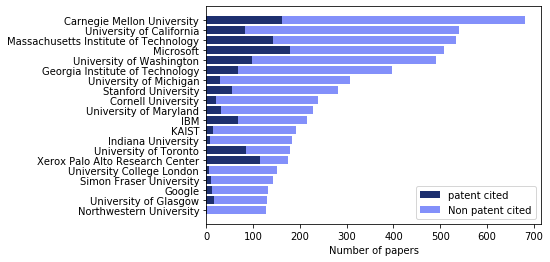

In [138]:
get_institute_paper_dist(df)

Text(0.5, 1.0, 'Number of HCI papers by institute, 1980-1990')

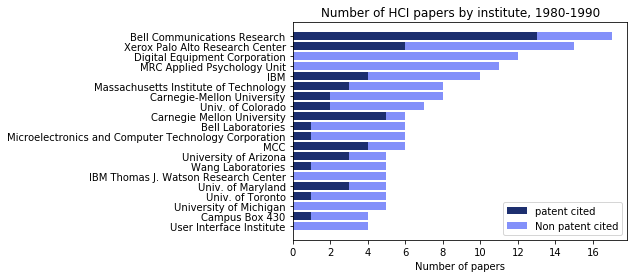

In [186]:
get_institute_paper_dist(df[df['year_range'] == pd.Interval(1980.0, 1990.0)])
plt.title('Number of HCI papers by institute, 1980-1990')

Text(0.5, 1.0, 'Number of HCI papers by institute, 1990-2000')

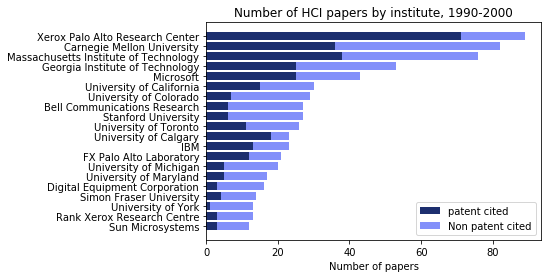

In [153]:
get_institute_paper_dist(df[df['year_range'] == pd.Interval(1990.0, 2000.0)])
plt.title('Number of HCI papers by institute, 1990-2000')

Text(0.5, 1.0, 'Number of HCI papers by institute, 2000-2005')

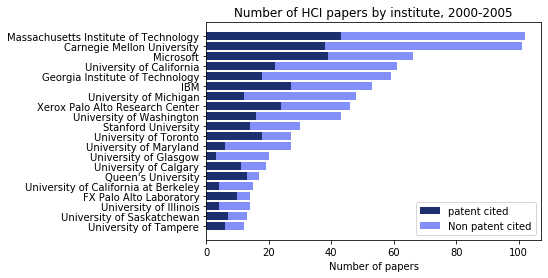

In [154]:
get_institute_paper_dist(df[df['year_range'] == pd.Interval(2000.0, 2005.0)])
plt.title('Number of HCI papers by institute, 2000-2005')

Text(0.5, 1.0, 'Number of HCI papers by institute, 2005-2010')

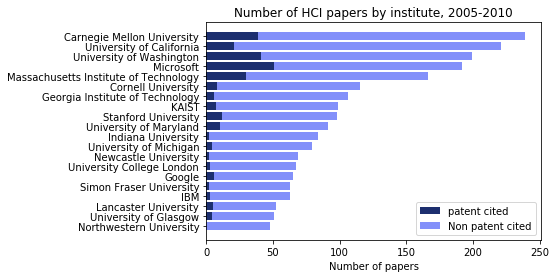

In [156]:
get_institute_paper_dist(df[df['year_range'] == pd.Interval(2010.0, 2015.0)])
plt.title('Number of HCI papers by institute, 2005-2010')

Text(0.5, 1.0, 'Number of HCI papers by institute, 2010-2015')

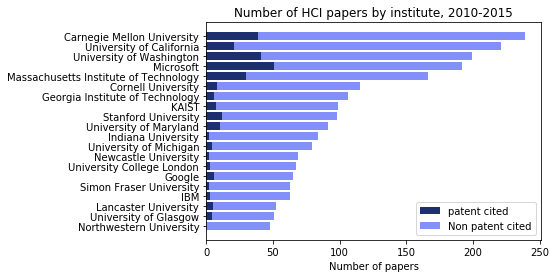

In [155]:
get_institute_paper_dist(df[df['year_range'] == pd.Interval(2010.0, 2015.0)])
plt.title('Number of HCI papers by institute, 2010-2015')

Text(0.5, 1.0, 'Number of HCI papers by institute, 2015-2020')

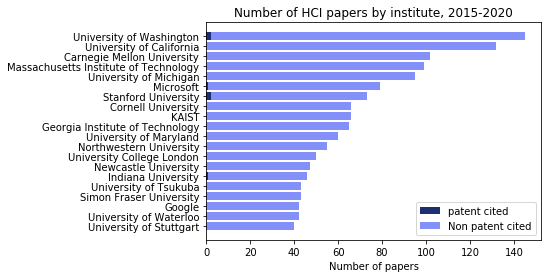

In [157]:
get_institute_paper_dist(df[df['year_range'] == pd.Interval(2015.0, 2020.0)])
plt.title('Number of HCI papers by institute, 2015-2020')

In [ ]:
# for papers 

In [22]:
# institues with highest ratio of patent recognized papers
org_patent_cited_paper_rate = {}
for key in set(org_paper_num.keys()).intersection(set(org_patent_cited_paper_num.keys())):
    org_patent_cited_paper_rate[key] = org_patent_cited_paper_num[key]/org_paper_num[key]

In [23]:
df_institute = org_patent_cited_paper_rate

{'': 0.1518987341772152,
 'Institut National de Re her he en Informatique et en Automatique (INRIA)': 1.0,
 'Google': 0.1,
 'Artificial Intelligence Laboratory': 0.16666666666666666,
 'Department of Information Systems': 0.25,
 'Massachusetts Institute of Technology & Comenius University': 1.0,
 'MIT Media-Lab': 1.0,
 'Cavendish Laboratory': 1.0,
 'Open University': 0.3333333333333333,
 'palmOne': 0.3333333333333333,
 'Kochi University of Technology': 0.18181818181818182,
 'Microsoft Research Asia & Chinese Academy of Sciences': 1.0,
 'SAP AG': 0.25,
 'Technische Universiteit Eindhoven (TU/e)': 1.0,
 'Dept. of Math. and Comp. Science': 1.0,
 'Intuit Inc.': 0.5,
 'University of Ontario Institute of Technology': 0.09523809523809523,
 'Media Lab Asia': 1.0,
 'Hebrew University': 1.0,
 'Fujitsu Ltd.': 1.0,
 'Xerox Corporation': 0.2,
 'CSCW Research Centre|Computing Department|Lancaster University': 1.0,
 'Hochschule Bremen (University of Applied Sciences)': 1.0,
 'North Carolina State Univ

In [ ]:
# comparing those cited by patents and those that didn't
# citation count, affiliation
# paper and patent citation over time
# first author and last author paper count

(array([ 63.,  75.,  84., 157., 136., 161., 236., 507., 691., 760.]),
 array([1986. , 1989.3, 1992.6, 1995.9, 1999.2, 2002.5, 2005.8, 2009.1,
        2012.4, 2015.7, 2019. ]),
 <a list of 10 Patch objects>)

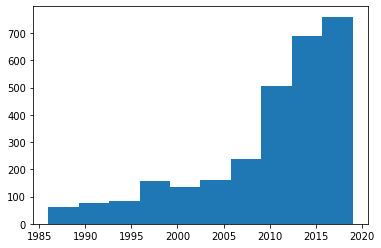

In [155]:
df_temp = df[df['venue'] == 'CSCW']
plt.hist(df_temp['year'],bins = 10)

Text(0.5, 1.0, 'academic impact of papers recognized in patents vs. those not recognized')

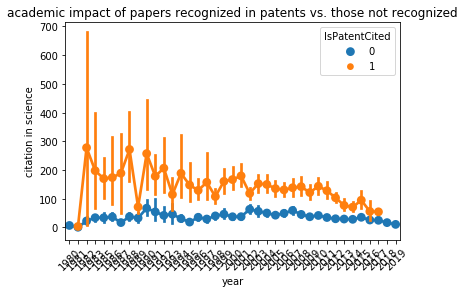

In [158]:


sns.pointplot(x = df['year'].astype('int'), y = 'citationCount', hue = 'IsPatentCited' , data = df)

plt.xticks(rotation=45)
plt.ylabel('citation in science')
plt.xlabel('year')
plt.title('academic impact of papers recognized in patents vs. those not recognized')

In [ ]:
# to do: top x% cited paper (hue) in each year (x) the percentage get recognized by patent (y)

In [175]:
df_temp.groupby(['year'])

In [184]:
#df.groupby(['year'])['citationCount'].transform(lambda x: pd.qcut(x, 5,labels=['20%','40%','60%', '80%','100%']))
df_temp = df[df['year']>1990]
df_temp.groupby(['year'])['citationCount'].transform(lambda x:pd.qcut(x.rank(method='first'), 3, labels=range(1,4)))

0        3
1        2
2        2
3        3
4        1
        ..
21956    3
21957    2
21958    2
21959    3
21960    2
Name: citationCount, Length: 21399, dtype: category
Categories (3, int64): [1 < 2 < 3]

In [ ]:
df.groupby('year').apply(lambda x: x[''])

In [ ]:
# top transferred institute over time (aggregated, and across time)

In [ ]:
# self citation over time

In [164]:
df

,index,mag_id,paperid,externalIds,url,title,abstract,venue,year,referenceCount,...,s2FieldsOfStudy,publicationTypes,publicationDate,journal,authors,patents,aff_affiliations,aff_authorids,aff_paperid,IsPatentCited
0,2,2244428935,f634a48ef7d4d92fb03b8cc97701a6820b86fd36,"{'ArXiv': '1510.08554', 'DBLP': 'conf/chi/Ruot...",https://www.semanticscholar.org/paper/f634a48e...,"""We're on the Same Page"": A Usability Study of...",Secure email is increasingly being touted as u...,CHI,2015.0,26.0,...,"[{'category': 'Computer Science', 'source': 'e...","['Book', 'JournalArticle', 'Conference', 'Revi...",2015-10-29,{'name': 'Proceedings of the 2016 CHI Conferen...,"{'offset': 0, 'data': [{'authorId': '2554572',...",NaN,['Brigham Young University & Sandia National L...,"['1140008411', '1833198927', '2176732160', '22...",2244428935,0
1,5,2336371700,e5801ac7dc12bb855fe19e7e0e055a2955d269db,"{'MAG': '2336371700', 'DBLP': 'conf/chi/KleekM...",https://www.semanticscholar.org/paper/e5801ac7...,Computationally Mediated Pro-Social Deception,Deception is typically regarded as a morally i...,CHI,2016.0,66.0,...,"[{'category': 'Psychology', 'source': 'externa...","['Book', 'JournalArticle', 'Conference']",2016-05-07,{'name': 'Proceedings of the 2016 CHI Conferen...,"{'offset': 0, 'data': [{'authorId': '2341082',...",NaN,"['University of Oxford, Oxford, Oxfordshire, U...","['1982381393', '1992824112', '2147622725', '26...",2336371700,0
2,9,2336913620,0da2cf9168d7ecaa7c77c756daa8641fc56a7b9d,"{'DBLP': 'conf/chi/Jamison-PowellB16', 'MAG': ...",https://www.semanticscholar.org/paper/0da2cf91...,"""PS. I Love You"": Understanding the Impact of ...",A number of digital platforms and services hav...,CHI,2016.0,76.0,...,"[{'category': 'Computer Science', 'source': 'e...","['JournalArticle', 'Book', 'Conference']",2016-05-07,{'name': 'Proceedings of the 2016 CHI Conferen...,"{'offset': 0, 'data': [{'authorId': '140460355...",NaN,"['University of Lincoln, Lincoln, Lincolnshire...","['1955510120', '2108510301', '2127990789', '22...",2336913620,0
3,16,2337539845,b9200c781680c4fa411d7bd27e7137b6ede3d12e,"{'DBLP': 'conf/chi/Hamilton-Fletcher16', 'MAG'...",https://www.semanticscholar.org/paper/b9200c78...,"""I Always Wanted to See the Night Sky"": Blind ...",Sensory Substitution Devices (SSDs) convert vi...,CHI,2016.0,52.0,...,"[{'category': 'Computer Science', 'source': 'e...","['Book', 'JournalArticle', 'Conference']",2016-05-07,{'name': 'Proceedings of the 2016 CHI Conferen...,"{'offset': 0, 'data': [{'authorId': '140462149...",NaN,"['University of Sussex, Brighton, United Kingd...","['1859118659', '1982436788', '2193021613', '24...",2337539845,0
4,17,2337630312,2cb44170c68d709e074bcacbc3dc478f641ede86,"{'MAG': '2337630312', 'DBLP': 'conf/chi/Gilard...",https://www.semanticscholar.org/paper/2cb44170...,Design Fiction Film-Making: A Pipeline for Com...,The use of films in early stages of the design...,CHI,2016.0,28.0,...,"[{'category': 'Computer Science', 'source': 'e...","['JournalArticle', 'Book']",2016-05-07,{'name': 'Proceedings of the 2016 CHI Conferen...,"{'offset': 0, 'data': [{'authorId': '3318547',...",NaN,"['University of Sussex, Brighton, United Kingd...","['1859118659', '1982436788', '2107836554', '21...",2337630312,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21956,26303,2094793656,f72a36ece13b8546b1164f64f17ebbac3f28c1ea,"{'MAG': '2094793656', 'DBLP': 'conf/uist/Klemm...",https://www.semanticscholar.org/paper/f72a36ec...,The designers' outpost: a tangible interface f...,"In our previous studies into web design, we fo...",UIST,2001.0,29.0,...,"[{'category': 'Computer Science', 'source': 'e...",['JournalArticle'],2001-11-11,{'pages': '1-10'},"{'offset': 0, 'data': [{'authorId': '21520403'...","{""7134756"": ""{\""patent_info\"": \""[{\\\""country...","['University of California at Berkeley, Berkel...","['2095943436', '2193817519', '2298605129', '26...",2094793656,1
21957,26304,2014853711,c8aaf654d76187c18014c

In [283]:
def stemming_sentence(sentence):
    try:
        words = nltk.tokenize.word_tokenize(sentence)
        words_s = ''
        for w in words:
            #w_s = lemmatizer.lemmatize(w)
            w_s = stemmer.stem(w)
            words_s+=w_s+' '
        return words_s
    except:
        return ''

In [269]:
lemmatizer.lemmatize('understanding')

'understanding'

In [295]:
stemmer.stem('generously')

'generous'

In [284]:
df['title_processed'] = df['title'].apply(stemming_sentence)
df['abstract_processed'] = df['abstract'].apply(stemming_sentence)

In [285]:
df['paper_text'] = df['title_processed'] + ' ' + df['abstract_processed']

In [409]:
%%time
df['paper_text'][0:10].apply(return_top_keywords1)

Wall time: 3.37 s


0    [mobile device, pattern creation, unlocking ge...
1    [mobile device, pattern creation, unlocking ge...
2    [mobile device, pattern creation, unlocking ge...
3    [mobile device, pattern creation, unlocking ge...
4    [mobile device, pattern creation, unlocking ge...
5    [mobile device, pattern creation, unlocking ge...
6    [mobile device, pattern creation, unlocking ge...
7    [mobile device, pattern creation, unlocking ge...
8    [mobile device, pattern creation, unlocking ge...
9    [mobile device, pattern creation, unlocking ge...
Name: paper_text, dtype: object

In [407]:
df['paper_text'][0:10]

0    effect of reproduct techniqu on interact with ...
1    understand the situat use of healthcar technol...
2    chi 05 extend abstract on human factor in comp...
3    prevent camera record by design a capture-resi...
4    proceed of the 2nd intern workshop on research...
5    proceed of the sigchi confer on human factor i...
6    a cognit theori of multimedia learn : implic f...
7    adapt of method-resourc between project : a ca...
8    sociabl in virtual citizen scienc  past resear...
9    biosphera : a prototyp design for learn about ...
Name: paper_text, dtype: object

# textual difference between patent cited papers and non patent cited papers

In [427]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#import shap
from sklearn.feature_extraction import text

In [435]:
def get_tfidf_top_features(documents,n_top=50):
    my_stop_words = text.ENGLISH_STOP_WORDS.union(["includ","present","aim","hci","research","researcher","provide","paper"])
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=0.01, ngram_range = (1,2),stop_words=my_stop_words)
    tfidf = tfidf_vectorizer.fit_transform(documents)
    importance = np.argsort(np.asarray(tfidf.sum(axis=0)).ravel())[::-1]
    tfidf_feature_names = np.array(tfidf_vectorizer.get_feature_names())
    return tfidf_feature_names[importance[:n_top]]

In [447]:
get_tfidf_top_features(df['paper_text'],30)

array(['design', 'user', 'use', 'interact', 'studi', 'interfac', 'inform',
       'social', 'data', 'work', 'technolog', 'experi', 'support',
       'comput', 'develop', 'visual', 'devic', 'applic', 'mobil',
       'collabor', 'provid', 'result', 'model', 'peopl', 'display',
       'activ', 'game', 'human', 'task', 'particip'], dtype='<U20')

In [448]:
for range in [pd.Interval(1980, 1990.0),pd.Interval(1990, 2000.0),pd.Interval(2000, 2005.0),pd.Interval(2005, 2010.0),pd.Interval(2010, 2015.0),pd.Interval(2015, 2020.0)]:
    df_temp = df[df['year_range'] == range]
    print ('top keywords for papers: ' + str(range))
    print(get_tfidf_top_features(df_temp['paper_text'],30))

top keywords for papers: (1980, 1990.0]
['user' 'interfac' 'design' 'comput' 'use' 'interact' 'user interfac'
 'human' 'program' 'model' 'work' 'develop' 'inform' 'applic' 'support'
 'task' 'group' 'communic' 'problem' 'studi' 'languag' 'graphic' 'data'
 'describ' 'provid' 'softwar' 'command' 'perform' 'process' 'experi']
top keywords for papers: (1990, 2000.0]
['design' 'user' 'interfac' 'use' 'interact' 'inform' 'comput' 'develop'
 'work' 'support' 'model' 'applic' 'user interfac' 'visual' 'collabor'
 'tool' 'task' 'environ' 'usabl' 'techniqu' 'object' 'provid' 'describ'
 'studi' 'technolog' 'group' 'human' 'data' 'new' 'web']
top keywords for papers: (2000, 2005.0]
['user' 'design' 'use' 'interact' 'inform' 'interfac' 'comput' 'studi'
 'display' 'support' 'web' 'develop' 'devic' 'collabor' 'visual'
 'technolog' 'experi' 'work' 'techniqu' 'social' 'communic' 'task'
 'environ' 'usabl' 'result' 'applic' 'describ' 'model' 'evalu' 'tool']
top keywords for papers: (2005, 2010.0]
['user' '

In [ ]:
## reference: https://buhrmann.github.io/tfidf-analysis.html

In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction import text

In [334]:
    # classifier: tfidf 
    #key = 'paper_text'
    df_temp =df
    df_temp = df[df['venue']=='CSCW']
    df_temp = df_temp[[key, 'IsPatentCited']].dropna()
   
    X_train, X_test, y_train, y_test = train_test_split(df_temp[key],df_temp['IsPatentCited'], random_state=42)
    logisticRegr = LogisticRegression()
    my_stop_words = text.ENGLISH_STOP_WORDS.union(["includ","present","aim","hci","research","researcher","provide","paper"])
    vectorizer = TfidfVectorizer(stop_words=my_stop_words, ngram_range = (1,2), min_df=0.05, max_df=0.95)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    logisticRegr.fit(X_train_tfidf, y_train)

    X_test_tfidf = vectorizer.transform(X_test)
    y_test_hat = logisticRegr.predict(X_test_tfidf)

In [331]:
import statsmodels.api as sm
log_reg = sm.Logit(y_train,X_train_tfidf.toarray()).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.351330
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          IsPatentCited   No. Observations:                 2387
Model:                          Logit   Df Residuals:                     2201
Method:                           MLE   Df Model:                          185
Date:                Thu, 18 Aug 2022   Pseudo R-squ.:                  0.1465
Time:                        13:50:49   Log-Likelihood:                -838.63
converged:                       True   LL-Null:                       -982.52
Covariance Type:            nonrobust   LLR p-value:                 1.911e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.7164      1.085      2.503      0.012       0.589       4.843
x2             1.3420      1.

In [332]:
def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of 
    the coefficients with 95% confidence intervals.
    
    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary 
    coef_df = pd.DataFrame(results.summary().tables[1].data)
    
    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)
    coef_df[coef_df.columns[0]] = list(vectorizer.get_feature_names_out())
    # Set index to variable names 
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']
    
    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    #coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])
    
    coef_df = coef_df[coef_df['P>|z|']<0.05]
    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)
    
    # Add variables column to dataframe
    coef_df['variables'] = variables
    
    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(10, 25))
    
    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot.barh(x='variables', y='coef',
                 ax=ax, color='none', fontsize=22, 
                 ecolor='steelblue',capsize=0,
                 xerr='errors', legend=False)
    
    # Set title & labels
    plt.title('Significant paper keywords that predict/not predict patent citation',fontsize=30)
    ax.set_xlabel('Coefficients',fontsize=22)
    ax.set_ylabel('',fontsize=18)
    
    # Coefficients
    ax.scatter(y=pd.np.arange(coef_df.shape[0]), 
               marker='o', s=80, 
               x=coef_df['coef'], color='steelblue')
    
    # Line to define zero on the y-axis
    ax.axvline(x=0, linestyle='--', color='red', linewidth=1)
    

    plt.show()

C:\Users\hanch\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


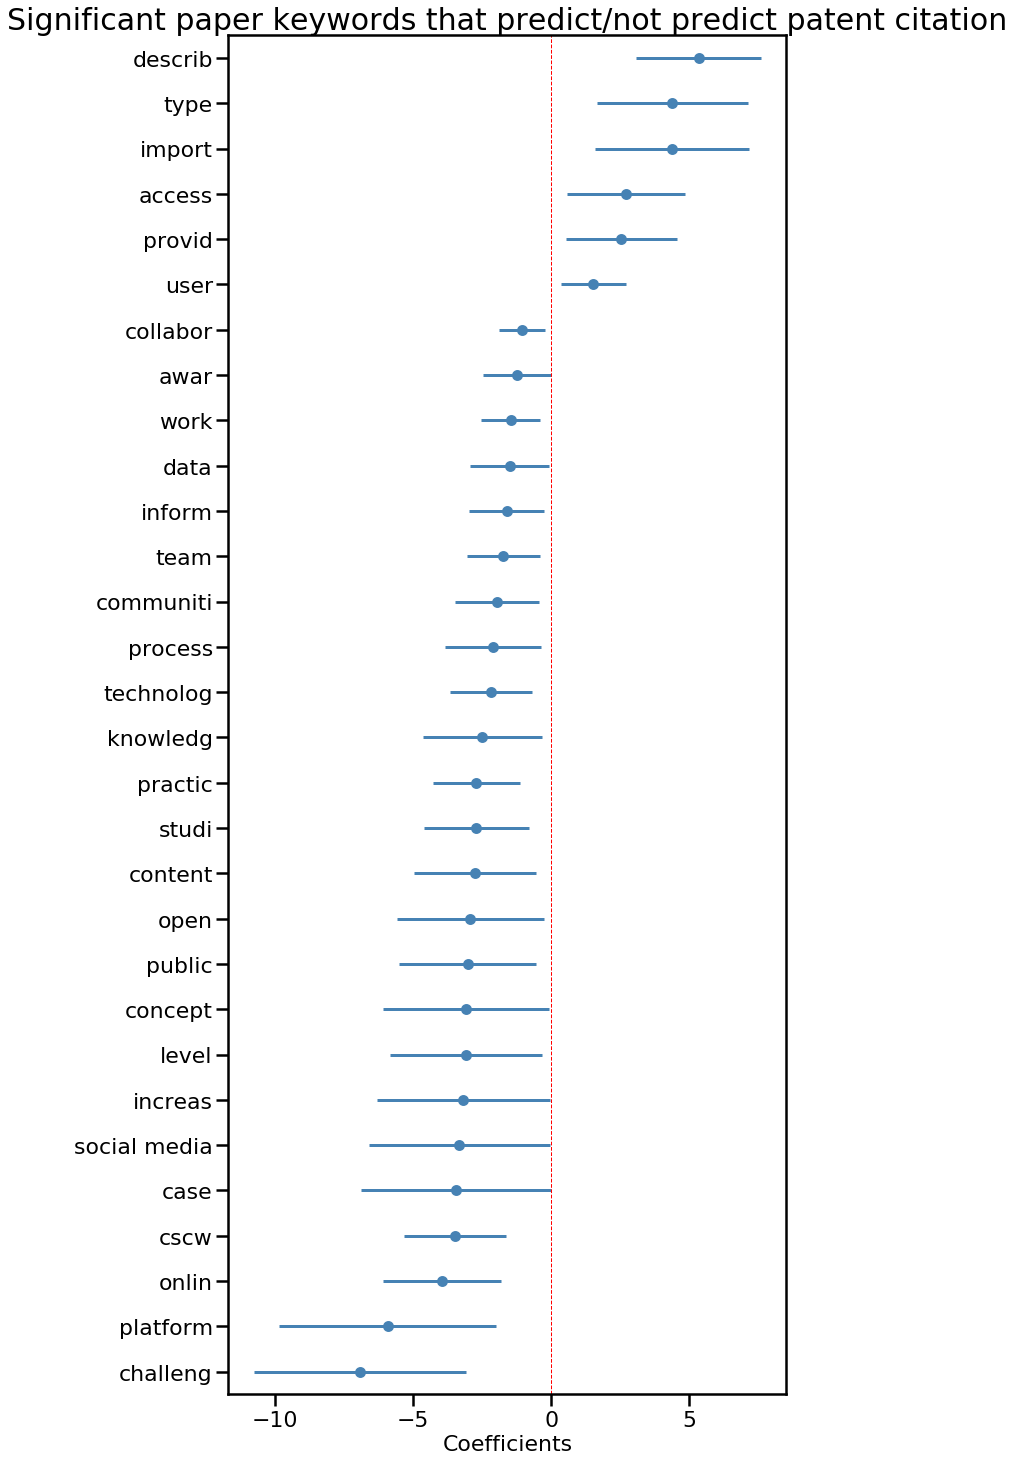

In [333]:
coefplot(log_reg)

In [ ]:
shap.initjs()
explainer = shap.LinearExplainer(logisticRegr, X_train_tfidf.toarray())
#explainer = shap.Explainer(logisticRegr, X_train_tfidf)
shap_values = explainer.shap_values(X_test_tfidf)
X_test_array = X_test_tfidf.toarray() # we need to pass a dense version for the plotting functions
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names())

In [88]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap

shap.initjs()

corpus_train, corpus_test, y_train, y_test = train_test_split(df_temp[key],df_temp['IsPatentCited'], test_size=0.2, random_state=7)

vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(corpus_train)
X_test = vectorizer.transform(corpus_test)

model = sklearn.linear_model.LogisticRegression()
model.fit(X_train, y_train)

explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")
shap_values = explainer.shap_values(X_test)
X_test_array = X_test.toarray() # we need to pass a dense version for the plotting functions

shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names())

AttributeError: 'LinearExplainer' object has no attribute 'mean'

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


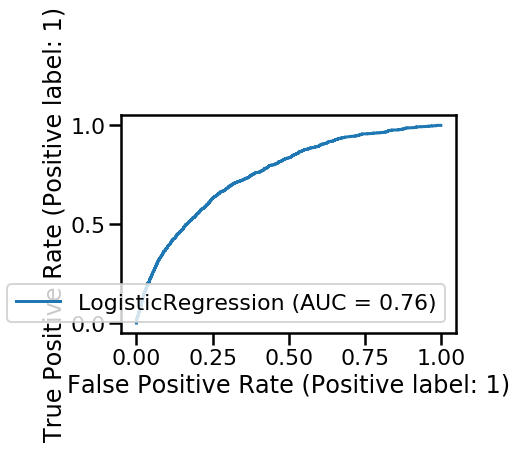

In [316]:
metrics.plot_roc_curve(logisticRegr, X_test_tfidf, y_test) 

In [319]:
features = vectorizer.get_feature_names()

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [320]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [321]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [322]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [323]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [324]:
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        if df.label == 1:
            ax.set_title("papers cited by patents", fontsize=16)
        else:
            ax.set_title("papers not cited by patents", fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()

In [325]:
dfs = top_feats_by_class(X_train_tfidf, y_train, features)

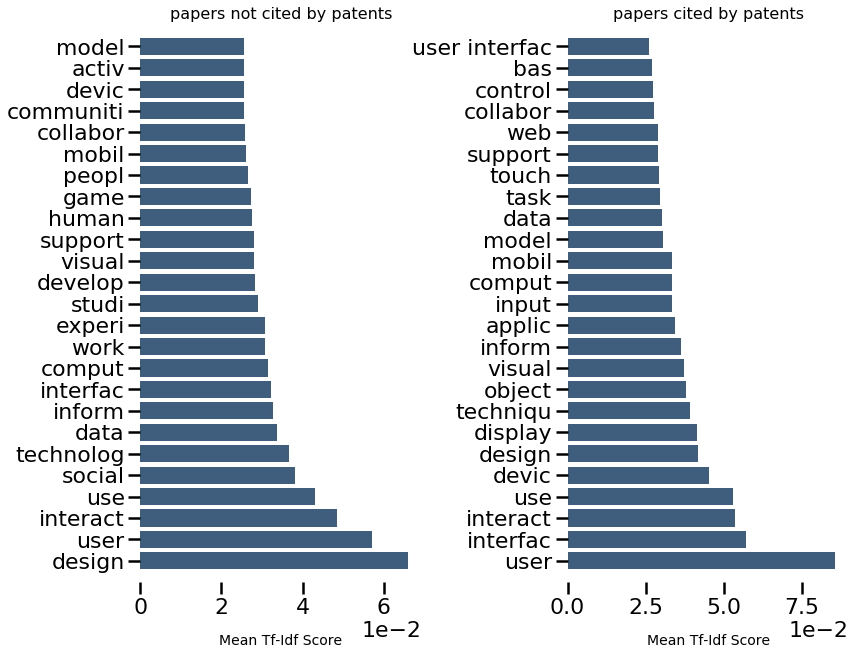

In [326]:
plot_tfidf_classfeats_h(dfs)

In [ ]:
# CHI

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


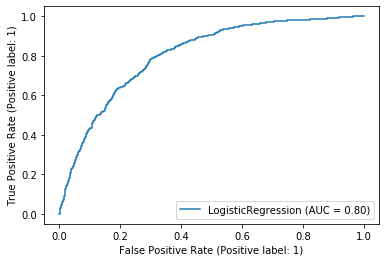

In [576]:
    # classifier: tfidf 
    key = 'paper_text'
    venue = 'CHI'
    df_temp = df[df['venue'] == venue]
    df_temp = df_temp[[key, 'IsPatentCited']].dropna()
    
    X_train, X_test, y_train, y_test = train_test_split(df_temp[key],df_temp['IsPatentCited'], random_state=42)
    logisticRegr = LogisticRegression()
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    logisticRegr.fit(X_train_tfidf, y_train)

    X_test_tfidf = vectorizer.transform(X_test)
    y_test_hat = logisticRegr.predict(X_test_tfidf)
    metrics.plot_roc_curve(logisticRegr, X_test_tfidf, y_test) 

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


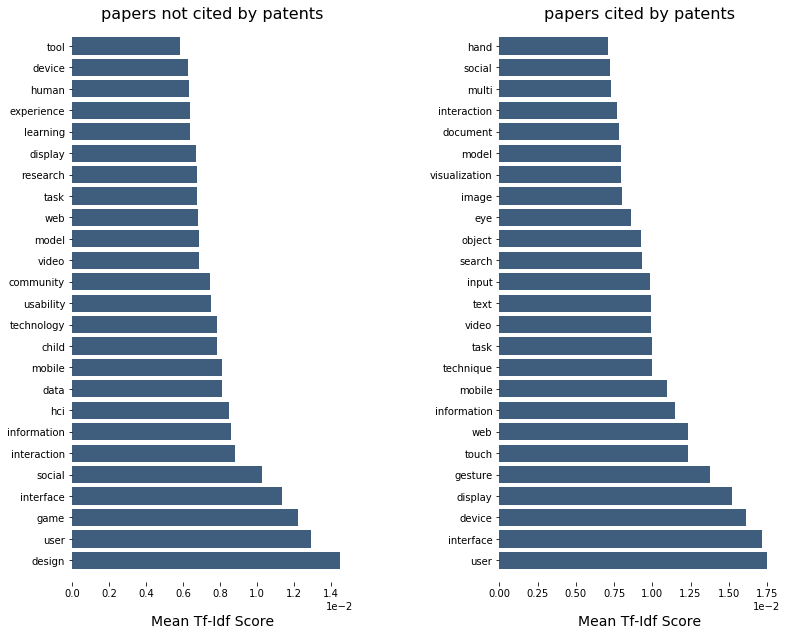

In [577]:
features = vectorizer.get_feature_names()
dfs = top_feats_by_class(X_train_tfidf, y_train, features)
plot_tfidf_classfeats_h(dfs)

In [ ]:
# CSCW

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


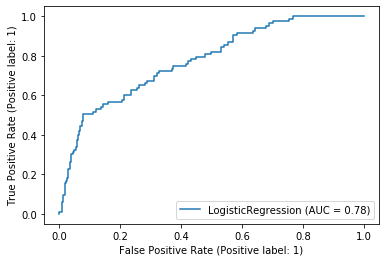

In [568]:
    # classifier: tfidf 
    key = 'paper_text'
    venue = 'CSCW'
    df_temp = df[df['venue'] == venue]
    df_temp = df_temp[[key, 'IsPatentCited']].dropna()
    
    X_train, X_test, y_train, y_test = train_test_split(df_temp[key],df_temp['IsPatentCited'], random_state=42)
    logisticRegr = LogisticRegression()
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    logisticRegr.fit(X_train_tfidf, y_train)

    X_test_tfidf = vectorizer.transform(X_test)
    y_test_hat = logisticRegr.predict(X_test_tfidf)
    metrics.plot_roc_curve(logisticRegr, X_test_tfidf, y_test) 

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


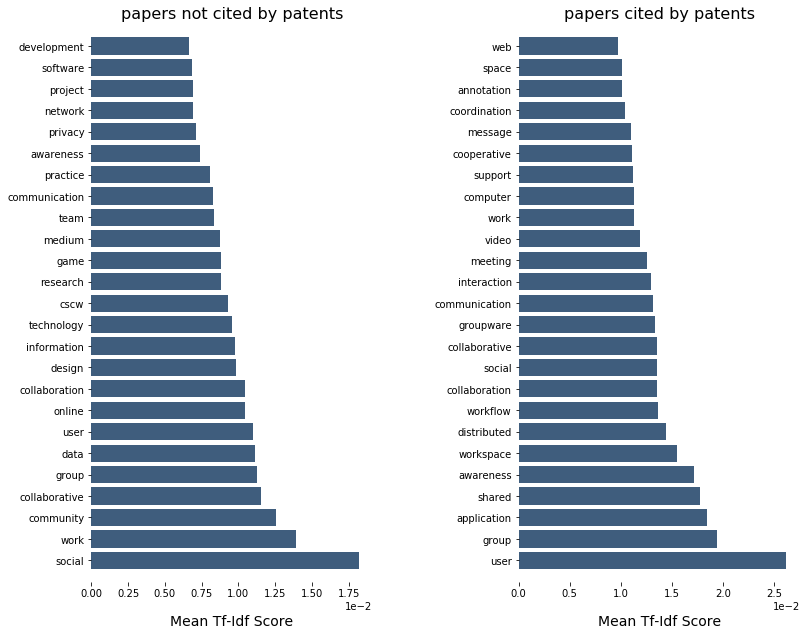

In [569]:
features = vectorizer.get_feature_names()
dfs = top_feats_by_class(X_train_tfidf, y_train, features)
plot_tfidf_classfeats_h(dfs)

In [ ]:
# UIST

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


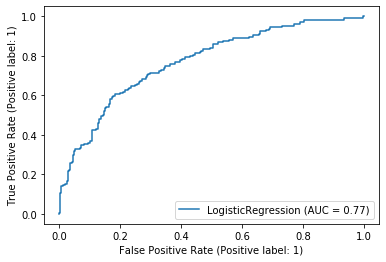

In [570]:
    # classifier: tfidf 
    key = 'paper_text'
    venue = 'UIST'
    df_temp = df[df['venue'] == venue]
    df_temp = df_temp[[key, 'IsPatentCited']].dropna()
    
    X_train, X_test, y_train, y_test = train_test_split(df_temp[key],df_temp['IsPatentCited'], random_state=42)
    logisticRegr = LogisticRegression()
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    logisticRegr.fit(X_train_tfidf, y_train)

    X_test_tfidf = vectorizer.transform(X_test)
    y_test_hat = logisticRegr.predict(X_test_tfidf)
    metrics.plot_roc_curve(logisticRegr, X_test_tfidf, y_test) 

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


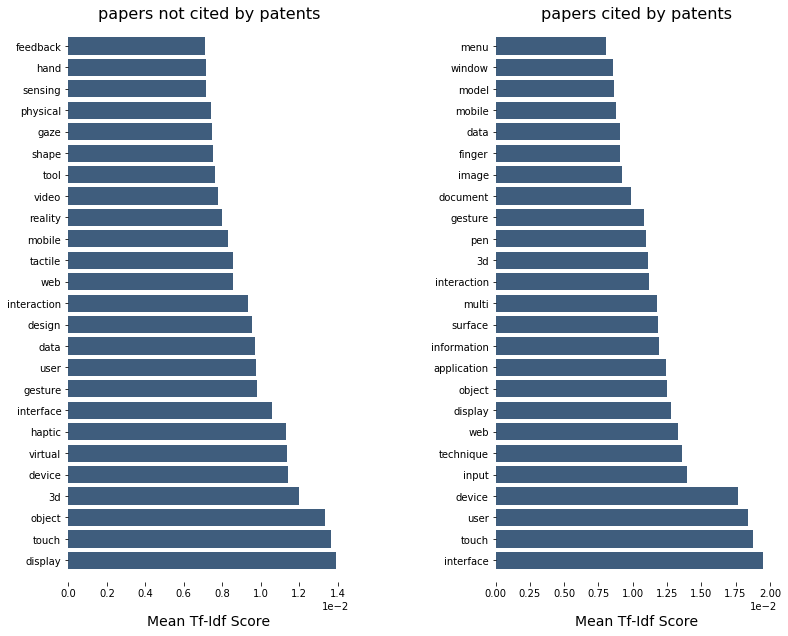

In [571]:
features = vectorizer.get_feature_names()
dfs = top_feats_by_class(X_train_tfidf, y_train, features)
plot_tfidf_classfeats_h(dfs)

In [ ]:
# UBI

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


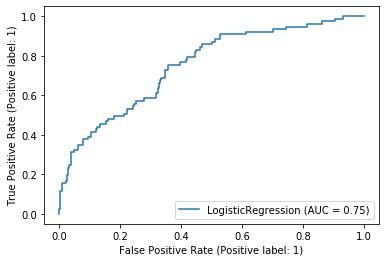

In [572]:
    # classifier: tfidf 
    key = 'paper_text'
    venue = 'UBI'
    df_temp = df[df['venue'] == venue]
    df_temp = df_temp[[key, 'IsPatentCited']].dropna()
    
    X_train, X_test, y_train, y_test = train_test_split(df_temp[key],df_temp['IsPatentCited'], random_state=42)
    logisticRegr = LogisticRegression()
    vectorizer = TfidfVectorizer(stop_words='english')
    X_train_tfidf = vectorizer.fit_transform(X_train)
    logisticRegr.fit(X_train_tfidf, y_train)

    X_test_tfidf = vectorizer.transform(X_test)
    y_test_hat = logisticRegr.predict(X_test_tfidf)
    metrics.plot_roc_curve(logisticRegr, X_test_tfidf, y_test) 

C:\Users\hanch\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


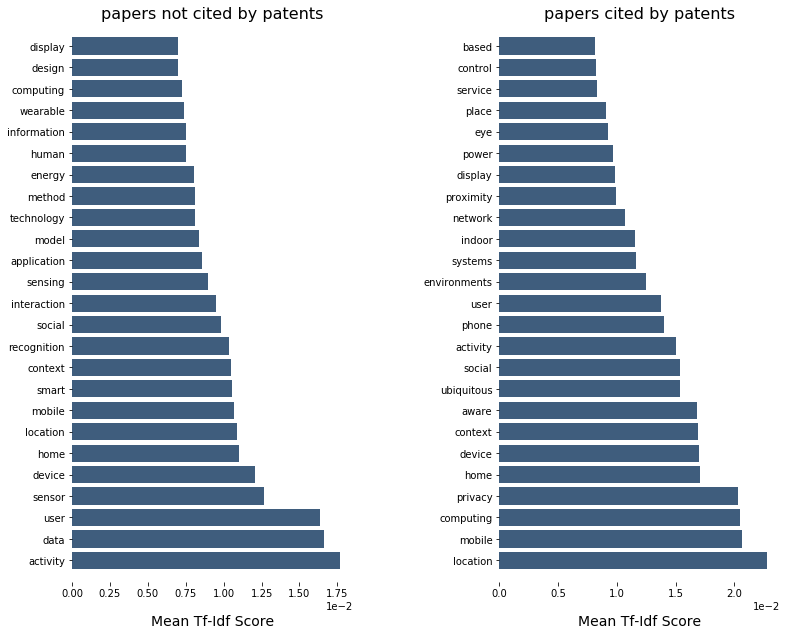

In [573]:
features = vectorizer.get_feature_names()
dfs = top_feats_by_class(X_train_tfidf, y_train, features)
plot_tfidf_classfeats_h(dfs)

In [440]:
# word cloud
from wordcloud import WordCloud

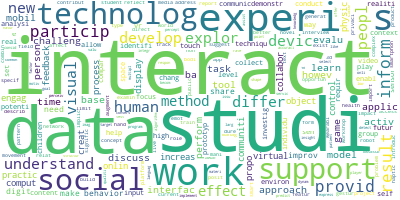

In [446]:
# title patent not cited
df_temp = df[df['year_range'] == pd.Interval(2015.0, 2020.0)]
long_string = ','.join(list(df_temp['paper_text'].values))
my_stop_words = text.ENGLISH_STOP_WORDS.union(["includ","present","aim","hci","research","researcher","provide","paper",'use','user','design'])
# Create a WordCloud object
wordcloud = WordCloud(stopwords=my_stop_words,collocations=False,background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()


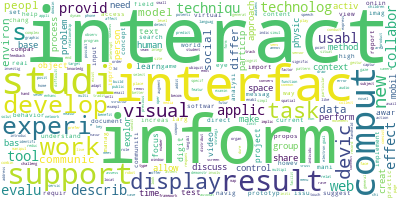

In [445]:
df_temp = df[df['year_range'] == pd.Interval(2000.0, 2005.0)]
long_string = ','.join(list(df_temp['paper_text'].values))
my_stop_words = text.ENGLISH_STOP_WORDS.union(["includ","present","aim","hci","research","researcher","provide","paper",'use','user','design'])
# Create a WordCloud object
wordcloud = WordCloud(stopwords=my_stop_words, collocations=False,background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

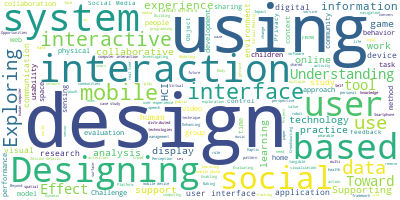

In [436]:
# title patent not cited
df_temp = df[df['IsPatentCited']==0]
long_string = ','.join(list(df_temp['title'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
# title patent cited
df_temp = df[df['IsPatentCited']==1]
long_string = ','.join(list(df_temp['title'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

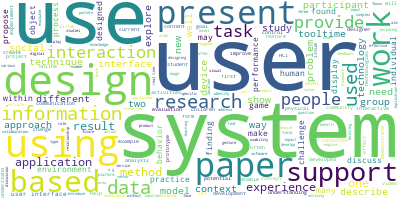

In [442]:
# abstract, patent not cited
df_temp = pd.DataFrame(df[df['IsPatentCited']==0]['abstract']).dropna()
long_string = ','.join(list(df_temp['abstract'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

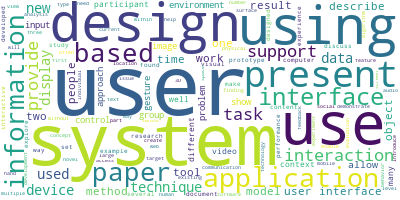

In [443]:
# abstract, patent cited
df_temp = pd.DataFrame(df[df['IsPatentCited']==1]['abstract']).dropna()
long_string = ','.join(list(df_temp['abstract'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

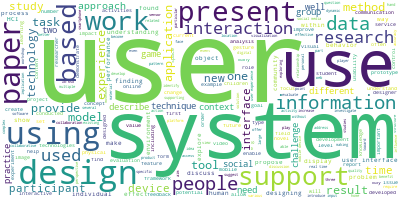

In [466]:
# abstract, patent not cited
df_temp = pd.DataFrame(df[df['IsPatentCited']==0][['abstract','title']]).dropna()
long_string = ','.join(list(df_temp['abstract'].values)) + ','.join(list(df_temp['title'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [35]:
df_temp = df[df['venue']=='UIST']
df_temp = df_temp[df_temp['year']==1995]
sum(list(df_temp['IsPatentCited']))/len(df_temp['IsPatentCited'])

0.7878787878787878

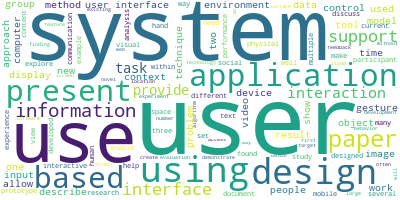

In [445]:
# abstract, patent not cited
df_temp = pd.DataFrame(df[df['IsPatentCited']==1][['abstract','title']]).dropna()
long_string = ','.join(list(df_temp['abstract'].values)) + ','.join(list(df_temp['title'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [186]:
def load_json(string):
    try:
        return json.loads(string)
    except:
        return {float('NaN'):float('NaN')}

In [192]:
df['patents'].apply(load_json)

0                                               {nan: nan}
1                                               {nan: nan}
2                                               {nan: nan}
3                                               {nan: nan}
4                                               {nan: nan}
                               ...                        
21956    {'7134756': '{"patent_info": "[{\"country\":\"...
21957    {'8660934': '{"patent_info": "[{\"country\":\"...
21958    {'8671096': '{"patent_info": "[{\"country\":\"...
21959                                           {nan: nan}
21960    {'8135602': '{"patent_info": "[{\"country\":\"...
Name: patents, Length: 21961, dtype: object

In [188]:
df1 = (pd.DataFrame(load_json(df['patents'].values))
         .stack()
         .reset_index(level=1)
         .rename(columns={0:'val','level_1':'key'}))

ValueError: If using all scalar values, you must pass an index

In [ ]:
# what are those highly cited papers in academia but didn't appear in patent
# check percentile plot, e.g. top 10% paper how much enter in patents
# specific paper names
# time lag

In [ ]:
# check the extent of self cite

In [175]:
patent_num = []
for i in range(21961):
    try:
        patent_num.append(len(json.loads(df["patents"][i]).keys()))
    except:
        patent_num.append(0)

In [177]:
sum(patent_num)

39729

In [173]:
json.loads(df["patents"][21958]).keys()

dict_keys(['8671096', '8996984', '9298855'])

In [196]:
json.loads(json.loads(df["patents"][21958])['9298855'])

{'patent_info': '[{"country":"US","date":"2016-03-29","abstract":"Improved visual context management techniques are disclosed. By way of example, a technique for updating an existing visual display to incorporate new information comprises obtaining new information requested by a subsequent user query, and dynamically deriving one or more visual transformations for updating at least a portion of the existing display to incorporate the new information, wherein the transformation derivation is modeled as an optimization operation which attempts to balance visual context management constraints and to achieve a desired presentation of intended information.","title":"Optimization-based visual context management","kind":"B2","num_claims":27,"withdrawn":0,"assignee_id":"8fb58dbc-6e3c-4f3e-9b9b-69f3af0bc714","assignee_name_first":null,"assignee_name_last":null,"organization":"INTERNATIONAL BUSINESS MACHINES CORPORATION"}]',
 'inventors': '[{"inventor_id":"fl:mi_ln:zhou-134","inventor_name_first

In [75]:
json.loads("""{"7134756": {"patent_info": [{"country": "US", "date": "2006-11-14", "abstract": "A display table contains a projector that can either project an image onto a display surface of the display table or onto an external surface that is separate from the display table. A user can change the path of the light from the projector from the display surface to the external surface, either by rotating the projector to an appropriate position, or by moving a mirror into the path of light from the projector. A video camera included in the display table also has dual functionality and can selectively be used either to image objects on or above the display surface, or objects that are not adjacent to the display surface. A panel in the housing of the table is opened, and either the video camera is pivoted or a mirror is moved into its light path. Imaging a user with the video camera is useful for video conferencing.", "title": "Selectable projector and imaging modes of display table", "kind": "B2", "num_claims": 17, "withdrawn": 0, "assignee_id": "0264c98c-8311-429a-b561-d8b9fa122dd5", "assignee_name_first": "nan", "assignee_name_last": "nan", "organization": "Microsoft Technology Licensing, LLC"}, {"country": "US", "date": "2006-11-14", "abstract": "A display table contains a projector that can either project an image onto a display surface of the display table or onto an external surface that is separate from the display table. A user can change the path of the light from the projector from the display surface to the external surface, either by rotating the projector to an appropriate position, or by moving a mirror into the path of light from the projector. A video camera included in the display table also has dual functionality and can selectively be used either to image objects on or above the display surface, or objects that are not adjacent to the display surface. A panel in the housing of the table is opened, and either the video camera is pivoted or a mirror is moved into its light path. Imaging a user with the video camera is useful for video conferencing.", "title": "Selectable projector and imaging modes of display table", "kind": "B2", "num_claims": 17, "withdrawn": 0, "assignee_id": "0264c98c-8311-429a-b561-d8b9fa122dd5", "assignee_name_first": "nan", "assignee_name_last": "nan", "organization": "Microsoft Technology Licensing, LLC"}, {"country": "US", "date": "2006-11-14", "abstract": "A display table contains a projector that can either project an image onto a display surface of the display table or onto an external surface that is separate from the display table. A user can change the path of the light from the projector from the display surface to the external surface, either by rotating the projector to an appropriate position, or by moving a mirror into the path of light from the projector. A video camera included in the display table also has dual functionality and can selectively be used either to image objects on or above the display surface, or objects that are not adjacent to the display surface. A panel in the housing of the table is opened, and either the video camera is pivoted or a mirror is moved into its light path. Imaging a user with the video camera is useful for video conferencing.", "title": "Selectable projector and imaging modes of display table", "kind": "B2", "num_claims": 17, "withdrawn": 0, "assignee_id": "0264c98c-8311-429a-b561-d8b9fa122dd5", "assignee_name_first": "nan", "assignee_name_last": "nan", "organization": "Microsoft Technology Licensing, LLC"}, {"country": "US", "date": "2006-11-14", "abstract": "A display table contains a projector that can either project an image onto a display surface of the display table or onto an external surface that is separate from the display table. A user can change the path of the light from the projector from the display surface to the external surface, either by rotating the projector to an appropriate position, or by moving a mirror into the path of light from the projector. A video camera included in the display table also has dual functionality and can selectively be used either to image objects on or above the display surface, or objects that are not adjacent to the display surface. A panel in the housing of the table is opened, and either the video camera is pivoted or a mirror is moved into its light path. Imaging a user with the video camera is useful for video conferencing.", "title": "Selectable projector and imaging modes of display table", "kind": "B2", "num_claims": 17, "withdrawn": 0, "assignee_id": "0264c98c-8311-429a-b561-d8b9fa122dd5", "assignee_name_first": "nan", "assignee_name_last": "nan", "organization": "Microsoft Technology Licensing, LLC"}, {"country": "US", "date": "2006-11-14", "abstract": "A display table contains a projector that can either project an image onto a display surface of the display table or onto an external surface that is separate from the display table. A user can change the path of the light from the projector from the display surface to the external surface, either by rotating the projector to an appropriate position, or by moving a mirror into the path of light from the projector. A video camera included in the display table also has dual functionality and can selectively be used either to image objects on or above the display surface, or objects that are not adjacent to the display surface. A panel in the housing of the table is opened, and either the video camera is pivoted or a mirror is moved into its light path. Imaging a user with the video camera is useful for video conferencing.", "title": "Selectable projector and imaging modes of display table", "kind": "B2", "num_claims": 17, "withdrawn": 0, "assignee_id": "0264c98c-8311-429a-b561-d8b9fa122dd5", "assignee_name_first": "nan", "assignee_name_last": "nan", "organization": "Microsoft Technology Licensing, LLC"}, {"country": "US", "date": "2006-11-14", "abstract": "A display table contains a projector that can either project an image onto a display surface of the display table or onto an external surface that is separate from the display table. A user can change the path of the light from the projector from the display surface to the external surface, either by rotating the projector to an appropriate position, or by moving a mirror into the path of light from the projector. A video camera included in the display table also has dual functionality and can selectively be used either to image objects on or above the display surface, or objects that are not adjacent to the display surface. A panel in the housing of the table is opened, and either the video camera is pivoted or a mirror is moved into its light path. Imaging a user with the video camera is useful for video conferencing.", "title": "Selectable projector and imaging modes of display table", "kind": "B2", "num_claims": 17, "withdrawn": 0, "assignee_id": "0264c98c-8311-429a-b561-d8b9fa122dd5", "assignee_name_first": "nan", "assignee_name_last": "nan", "organization": "Microsoft Technology Licensing, LLC"}], "inventors": [{"inventor_id": "fl:st_ln:drucker-3", "inventor_name_first": "Steven M.", "inventor_name_last": "Drucker", "male_flag": 1.0, "attribution_status": 1}, {"inventor_id": "fl:st_ln:drucker-3", "inventor_name_first": "Steven M.", "inventor_name_last": "Drucker", "male_flag": 1.0, "attribution_status": 1}, {"inventor_id": "fl:st_ln:drucker-3", "inventor_name_first": "Steven M.", "inventor_name_last": "Drucker", "male_flag": 1.0, "attribution_status": 1}, {"inventor_id": "fl:cu_ln:wong-9", "inventor_name_first": "Curtis G.", "inventor_name_last": "Wong", "male_flag": 0.0, "attribution_status": 1}, {"inventor_id": "fl:cu_ln:wong-9", "inventor_name_first": "Curtis G.", "inventor_name_last": "Wong", "male_flag": 0.0, "attribution_status": 1}, {"inventor_id": "fl:cu_ln:wong-9", "inventor_name_first": "Curtis G.", "inventor_name_last": "Wong", "male_flag": 0.0, "attribution_status": 1}]}}""")

{'7134756': {'patent_info': [{'country': 'US',
    'date': '2006-11-14',
    'abstract': 'A display table contains a projector that can either project an image onto a display surface of the display table or onto an external surface that is separate from the display table. A user can change the path of the light from the projector from the display surface to the external surface, either by rotating the projector to an appropriate position, or by moving a mirror into the path of light from the projector. A video camera included in the display table also has dual functionality and can selectively be used either to image objects on or above the display surface, or objects that are not adjacent to the display surface. A panel in the housing of the table is opened, and either the video camera is pivoted or a mirror is moved into its light path. Imaging a user with the video camera is useful for video conferencing.',
    'title': 'Selectable projector and imaging modes of display table',
    

In [70]:
df_patent_cited['patents'][21]

"{'9747096': {'patent_info': [{'country': 'US', 'date': '2017-08-29', 'abstract': 'The Remote Embedded Device Update Platform Apparatuses, Methods and Systems (“REDUP”) transforms telemetry inputs via REDUP components into remote embedded updates outputs. The REDUP may include a memory and processor with instructions to: obtain a remote embedded device connection request message from a remote embedded device and analyze the message to determine a version of embedded instructions on the remote embedded device. With that, the REDUP may determine if other remote embedded devices similar to the remote embedded device have provided request messages by searching a remote embedded device connection request message database. This allows the REDUP to determine if a potential issue requiring updates on the remote embedded device exists. With that, the REDUP may determine and provide an update for the remote embedded device.', 'title': 'Remote embedded device update platform apparatuses, methods 